# Exploring Indian Premier League with Network Science

# <img src="./data/alessandro-bogliari-oDs_AxeR5g4-unsplash.jpg" alt="Cricket Analytics">
<span>Photo by <a href="https://unsplash.com/@theinfluencermarketingfactory?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Alessandro Bogliari</a> on <a href="https://unsplash.com/s/photos/cricket?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## Data Preparation

In [1]:
### Setting the path to data
path = ".//data//"
data_folder = "ipl_male//"


### Looking at the files
import os
files = [f for f in os.listdir(path+data_folder) if 'yaml' in f]
for f in files:
    print (f)

### Importing the data from yaml files. Each files corresponds to a match.
import yaml
data = []
for f in files:
    with open(path+data_folder + f) as file:
        data.append(yaml.load(file,Loader=yaml.FullLoader))
        

### Removing the incomplete data points
data.remove(data[420])
data.remove(data[664])
        

1082591.yaml
1082592.yaml
1082593.yaml
1082594.yaml
1082595.yaml
1082596.yaml
1082597.yaml
1082598.yaml
1082599.yaml
1082600.yaml
1082601.yaml
1082602.yaml
1082603.yaml
1082604.yaml
1082605.yaml
1082606.yaml
1082607.yaml
1082608.yaml
1082609.yaml
1082610.yaml
1082611.yaml
1082612.yaml
1082613.yaml
1082614.yaml
1082615.yaml
1082616.yaml
1082617.yaml
1082618.yaml
1082620.yaml
1082621.yaml
1082622.yaml
1082623.yaml
1082624.yaml
1082625.yaml
1082626.yaml
1082627.yaml
1082628.yaml
1082629.yaml
1082630.yaml
1082631.yaml
1082632.yaml
1082633.yaml
1082634.yaml
1082635.yaml
1082636.yaml
1082637.yaml
1082638.yaml
1082639.yaml
1082640.yaml
1082641.yaml
1082642.yaml
1082643.yaml
1082644.yaml
1082645.yaml
1082646.yaml
1082647.yaml
1082648.yaml
1082649.yaml
1082650.yaml
1136561.yaml
1136562.yaml
1136563.yaml
1136564.yaml
1136565.yaml
1136566.yaml
1136567.yaml
1136568.yaml
1136569.yaml
1136570.yaml
1136571.yaml
1136572.yaml
1136573.yaml
1136574.yaml
1136575.yaml
1136576.yaml
1136577.yaml
1136578.yaml

In [2]:
### Looking at the content of a yaml file, corresponding to a match.

data[1]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'extras': {'wides': 1},
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 0, 'extras': 1, 'total': 1}}},
 {0.2: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'JC Buttler',
   'bowler': 'AB Dinda',
   'non_striker': 'PA Patel',
   'runs': {'batsman': 5, 'extras': 0, 'total': 5}}},
 {0.5: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 4, 'extras': 0, 'total': 4}}},
 {0.6: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.7: {'batsman': 'PA Patel',
   'bowler': 'AB Dinda',
   'non_striker': 'JC Buttler',
   'runs': {'batsman': 0, 'extras

## Graph Generation  

### Extracting nodes and edges

In [34]:
# The goal is to build a directed weighted graph where bowlers and batsmen are nodes and an edge
# is directed from a bowler to a batsmen and the edge weight is the number of runs conceded.
# This graph could be construced for a match, for a season or for all the seasons of IPL.

## Constructing tuples of bowler,batsman, runs which could be used for building edges of graph.
## The following function construct__bowler_batsman_runs__tuple 
### Input: data of a match (pertaining to one yaml file) , the innings of interest (1 or 2).
### Output: Nested tuples of the form: ((bowler,batsman),runs)

def construct__bowler_batsman_runs__tuple(data_match,inning):
    
    #creating empty lists to hold bowler,batsman,runs data to be zipped into tuples
    bowler = []
    batsman = []
    runs = []
    
    #set the key for the innings
    if inning is 2:
        key_inning = '2nd innings'
    elif inning is 1:
        key_inning = '1st innings'
    else:
        raise Exception("Error: innings is either 1 or 2.")
        return        
     
    _data = data_match['innings'][inning-1][key_inning]['deliveries'] 
    #number of overs bowled in this innings
    noOfOvers = len(_data)   
    
    #updating the lists with information from each ball bowled
    for over in range(0,noOfOvers):
        ballsinOver = _data[over].keys()
        for ball in ballsinOver:
            bowler.append(_data[over][ball]['bowler'])
            batsman.append(_data[over][ball]['batsman'])
            runs.append(_data[over][ball]['runs']['total'])
            
    #Forming a nested tuple of the form: ((bowler,batsman),runs)
    #The weights of the node would be total runs conceded by a bowler to a batsmen.
    #Currently these tuples are for individual deliveries.    
    bowler_batsman = zip(bowler,batsman)
    bowler_batsman__runs = zip(bowler_batsman,runs)
    
    bowler_batsman__runs = [((bo,ba),ru) for((bo,ba),ru) in bowler_batsman__runs]
    
    return bowler_batsman__runs
    

In [198]:
## Constructing edges from the tuples constructed above.
## The runs are summed for same bowler-batsman pair across all deliveries.

###Input: (list of) Nested tuples generated from construct__bowler_batsman_runs__tuple
###Output: Tuples of the form (bowler,batsman,total runs)

from collections import defaultdict
def create_edges_for_graph_bo_ba_ru(bowler_batsman__runs):  
    
    ##Using defaultdict with list() as the default method
    
    ddict = defaultdict(list)
    for boba_r in bowler_batsman__runs:
        #print(boba_r)
        for k,v in boba_r:
            ddict[k].append(v)     
   
    
    for k in ddict.keys():
        ddict[k] = sum(ddict[k])
        
    edges = list(zip( ddict.keys(), ddict.values() ) )
    
    
    return [(bo,ba,r) for (bo,ba),r in edges]   

In [307]:
## Testing with a few examples

nested_tuple_result=construct__bowler_batsman_runs__tuple(data[101],1)
nested_tuple_result.extend(construct__bowler_batsman_runs__tuple(data[101],2))
tuples_for_edges_bo_ba_ru = create_edges_for_graph_bo_ba_ru([nested_tuple_result])
print(tuples_for_edges_bo_ba_ru)
 

[('K Gowtham', 'SR Watson', 6), ('K Gowtham', 'AT Rayudu', 6), ('Ankit Sharma', 'AT Rayudu', 6), ('Ankit Sharma', 'SR Watson', 5), ('JC Archer', 'AT Rayudu', 0), ('JC Archer', 'SK Raina', 16), ('JC Archer', 'SR Watson', 6), ('K Gowtham', 'SK Raina', 16), ('BA Stokes', 'SK Raina', 9), ('BA Stokes', 'SR Watson', 4), ('JD Unadkat', 'SK Raina', 6), ('JD Unadkat', 'SR Watson', 10), ('IS Sodhi', 'SK Raina', 12), ('IS Sodhi', 'SR Watson', 10), ('JC Archer', 'MS Dhoni', 13), ('IS Sodhi', 'MS Dhoni', 7), ('BA Stokes', 'MS Dhoni', 2), ('BA Stokes', 'SW Billings', 15), ('IS Sodhi', 'SW Billings', 1), ('JD Unadkat', 'MS Dhoni', 13), ('JD Unadkat', 'SW Billings', 5), ('JC Archer', 'SW Billings', 7), ('BA Stokes', 'DJ Bravo', 1), ('DJ Willey', 'JC Buttler', 22), ('Harbhajan Singh', 'JC Buttler', 19), ('RA Jadeja', 'BA Stokes', 1), ('RA Jadeja', 'JC Buttler', 17), ('Harbhajan Singh', 'BA Stokes', 10), ('RA Jadeja', 'AM Rahane', 4), ('RA Jadeja', 'SV Samson', 3), ('SN Thakur', 'JC Buttler', 5), ('SN T

#### Building an Example Graph

{'B Kumar': Text(1.0, 0.049999990588740086, 'B Kumar'),
 'PP Shaw': Text(0.9458172308996318, 0.3746994594337786, 'PP Shaw'),
 'JJ Roy': Text(0.7891405176842488, 0.6642126963422238, 'JJ Roy'),
 'Sandeep Sharma': Text(0.5469481841996292, 0.8871664977997765, 'Sandeep Sharma'),
 'Shakib Al Hasan': Text(0.2454854823406425, 1.0194002993111615, 'Shakib Al Hasan'),
 'SS Iyer': Text(-0.08257935423192325, 1.0465844882953717, 'SS Iyer'),
 'RR Pant': Text(-0.40169543235644506, 0.9657733435359652, 'RR Pant'),
 'S Kaul': Text(-0.6772815966615287, 0.7857239200378671, 'S Kaul'),
 'HV Patel': Text(-0.8794737885694283, 0.5259474112818703, 'HV Patel'),
 'Rashid Khan': Text(-0.9863613699646997, 0.2145946147984924, 'Rashid Khan'),
 'GJ Maxwell': Text(-0.9863613699646997, -0.11459457401636607, 'GJ Maxwell'),
 'TA Boult': Text(-0.8794737885694283, -0.42594737049974407, 'TA Boult'),
 'AD Hales': Text(-0.6772816562661748, -0.6857239388603867, 'AD Hales'),
 'S Dhawan': Text(-0.40169528334482973, -0.865773421963

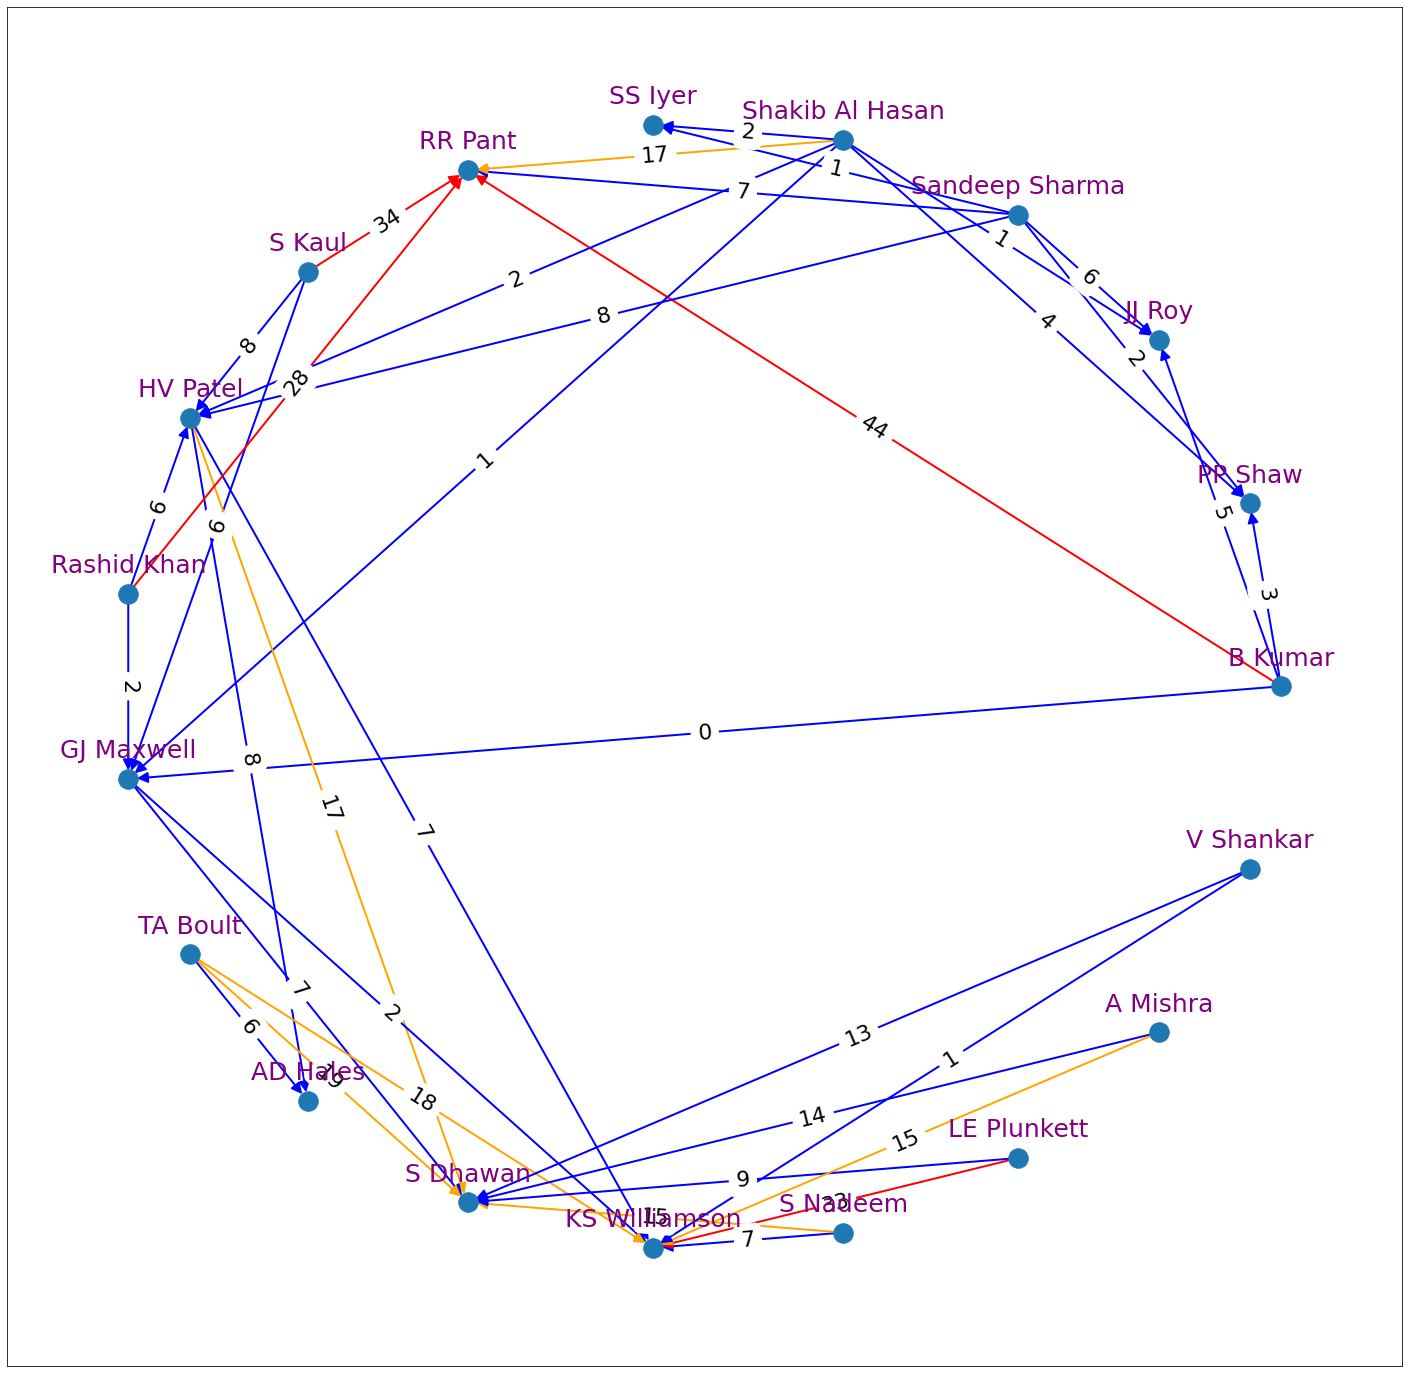

In [146]:
import matplotlib.pyplot as plt
import networkx as nx
 

G = nx.DiGraph()
plt.figure(figsize=(25,25)) 
 

for tup in tuples_for_edges:
    bo,ba,ru = tup       
    G.add_weighted_edges_from([(bo,ba,ru)])

## Coloring the edges based on runs conceded
edge_colors = [] 
for e  in G.edges():
    n1,n2 = e
    if G[n1][n2]["weight"] > 25:         
        edge_colors.append('red')
    elif G[n1][n2]["weight"] > 14:
        edge_colors.append('orange')
    else:
        edge_colors.append('blue')    

    
pos = []
pos = nx.circular_layout(G)  # positions for all nodes


nx.draw_networkx_nodes(G, pos, node_size=380)
nx.draw_networkx_edges(G, pos, width=2,arrowsize=22,edge_color=edge_colors)

weight_labels = nx.get_edge_attributes(G,'weight') 
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

label_pos = pos
for k in pos.keys():
    label_pos[k]=pos[k]+[0,0.05]
nx.draw_networkx_labels(G, label_pos, font_size=25, font_family="sans-serif",font_color = 'purple')


In [101]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(G, alpha=0.9)

In [102]:
pr
## We can see from the output that S. Dhawan and R.Pant are the best players.
## This is OK for this match as bowling was relegated to an inferior discipline.

{'B Kumar': 0.032705311057058616,
 'PP Shaw': 0.04121692739936753,
 'JJ Roy': 0.043984250939231515,
 'Sandeep Sharma': 0.032705311057058616,
 'Shakib Al Hasan': 0.032705311057058616,
 'SS Iyer': 0.036112054051209354,
 'RR Pant': 0.12847147719416976,
 'S Kaul': 0.032705311057058616,
 'HV Patel': 0.054508466219623325,
 'Rashid Khan': 0.032705311057058616,
 'GJ Maxwell': 0.039109987886062,
 'TA Boult': 0.032705311057058616,
 'AD Hales': 0.04907687103359096,
 'S Dhawan': 0.16706747134453998,
 'KS Williamson': 0.11339938336161924,
 'S Nadeem': 0.032705311057058616,
 'LE Plunkett': 0.032705311057058616,
 'A Mishra': 0.032705311057058616,
 'V Shankar': 0.032705311057058616}

### Constructing edges and nodes for dismissals by bowlers

In [257]:
#The goal is to introduce edges between bowlers and batsmen based on dismissals.
## In aparticular match the edg weight will be just 1. But this will be useful when multiple matches in
## a season(s) are considered.

###Input -- data for match, inning
###Output -- list of tuples (bowler,batsman) each tuple representing a dismissal.

def construct__bowler_batsman__dismissal_tuple(data_match,inning):
    #creating empty lists to hold bowler,batsman,runs data to be zipped into tuples
    bowler = []
    batsman = []    
    
    #set the key for the innings
    if inning is 2:
        key_inning = '2nd innings'
    elif inning is 1:
        key_inning = '1st innings'
    else:
        raise Exception("Error: innings is either 1 or 2.")
        return      
    
    _data = data_match['innings'][inning-1][key_inning]['deliveries'] 
    #number of overs bowled in this innings
    noOfOvers = len(_data)   
    
    #updating the lists with information from each ball bowled
    for over in range(0,noOfOvers):
        ballsinOver = _data[over].keys()
        for ball in ballsinOver:
            if 'wicket' in _data[over][ball].keys():
                bowler.append(_data[over][ball]['bowler'])
                batsman.append(_data[over][ball]['batsman'])
            
    #Forming a tuple of the form: (bowler,batsman)     
    bowler_batsman = zip(bowler,batsman)
    
    #converting to list    
    bowler_batsman = [(ba,bo)  for (bo,ba) in bowler_batsman]
    
    return bowler_batsman 
    

In [462]:
## Constructing edges from the tuples mined using construct__bowler_batsman__dismissal_tuple

from collections import defaultdict
def create_edges_for_graph_bo_ba_dismissals(bowler_batsman__dismissals):
    
    bo_ba_set = set(bowler_batsman__dismissals)    
    freq_dict = {}
    
    for bo_ba in bo_ba_set:
        freq_dict[bo_ba] = bowler_batsman__dismissals.count(bo_ba)
        
    edges =  list(zip(freq_dict.keys(),freq_dict.values()))
    return [(bo,ba,w*30) for (bo,ba),w in edges] 
    
    
        



In [308]:
## Testing with a few examples
dismissals_boba_tuples =[]
#for d in range(0,len(data)):
dismissals_boba_tuples.extend(construct__bowler_batsman__dismissal_tuple(data[101],1))
dismissals_boba_tuples.extend(construct__bowler_batsman__dismissal_tuple(data[101],2))
    

#print(dismissals_boba_tuples)
edges_bo_ba_wickets = create_edges_for_graph_bo_ba_dismissals(dismissals_boba_tuples)


#Lets check out a player's performance
for e in edges_bo_ba_wickets:
    (bo,ba,w) = e
    if bo in ['B Kumar']:
        print(e)
edges_bo_ba_wickets

[('BA Stokes', 'Harbhajan Singh', 20),
 ('SW Billings', 'BA Stokes', 20),
 ('P Chopra', 'SN Thakur', 20),
 ('AT Rayudu', 'JC Archer', 20),
 ('K Gowtham', 'DJ Willey', 20),
 ('STR Binny', 'DJ Bravo', 20),
 ('SK Raina', 'IS Sodhi', 20),
 ('AM Rahane', 'RA Jadeja', 20),
 ('SR Watson', 'JC Archer', 20),
 ('SV Samson', 'DJ Bravo', 20)]

#### Building another example graph

{'AR Patel': Text(0.9999999986627164, 0.04999999806415638, 'AR Patel'),
 'BB McCullum': Text(0.996757327175169, 0.1304665664803543, 'BB McCullum'),
 'PP Chawla': Text(0.987050233942829, 0.2104112813307314, 'PP Chawla'),
 'SR Tendulkar': Text(0.9709418402844713, 0.28931565671189446, 'SR Tendulkar'),
 'R Vinay Kumar': Text(0.9485364543283832, 0.36666800164995006, 'R Vinay Kumar'),
 'SC Ganguly': Text(0.9199794518030745, 0.44196660894899803, 'SC Ganguly'),
 'JJ Bumrah': Text(0.8854560243397386, 0.5147231675570425, 'JJ Bumrah'),
 'GJ Maxwell': Text(0.845190106588647, 0.5844658471063569, 'GJ Maxwell'),
 'RP Singh': Text(0.7994427668937412, 0.6507422781457209, 'RP Singh'),
 'NV Ojha': Text(0.7485107767811594, 0.7131226515819465, 'NV Ojha'),
 'DJ Bravo': Text(0.6927243459827367, 0.7712024306912137, 'DJ Bravo'),
 'Harbhajan Singh': Text(0.6324453939013072, 0.8246049737234388, 'Harbhajan Singh'),
 'DR Smith': Text(0.5680647481924016, 0.8729838584834185, 'DR Smith'),
 'RA Jadeja': Text(0.4999999

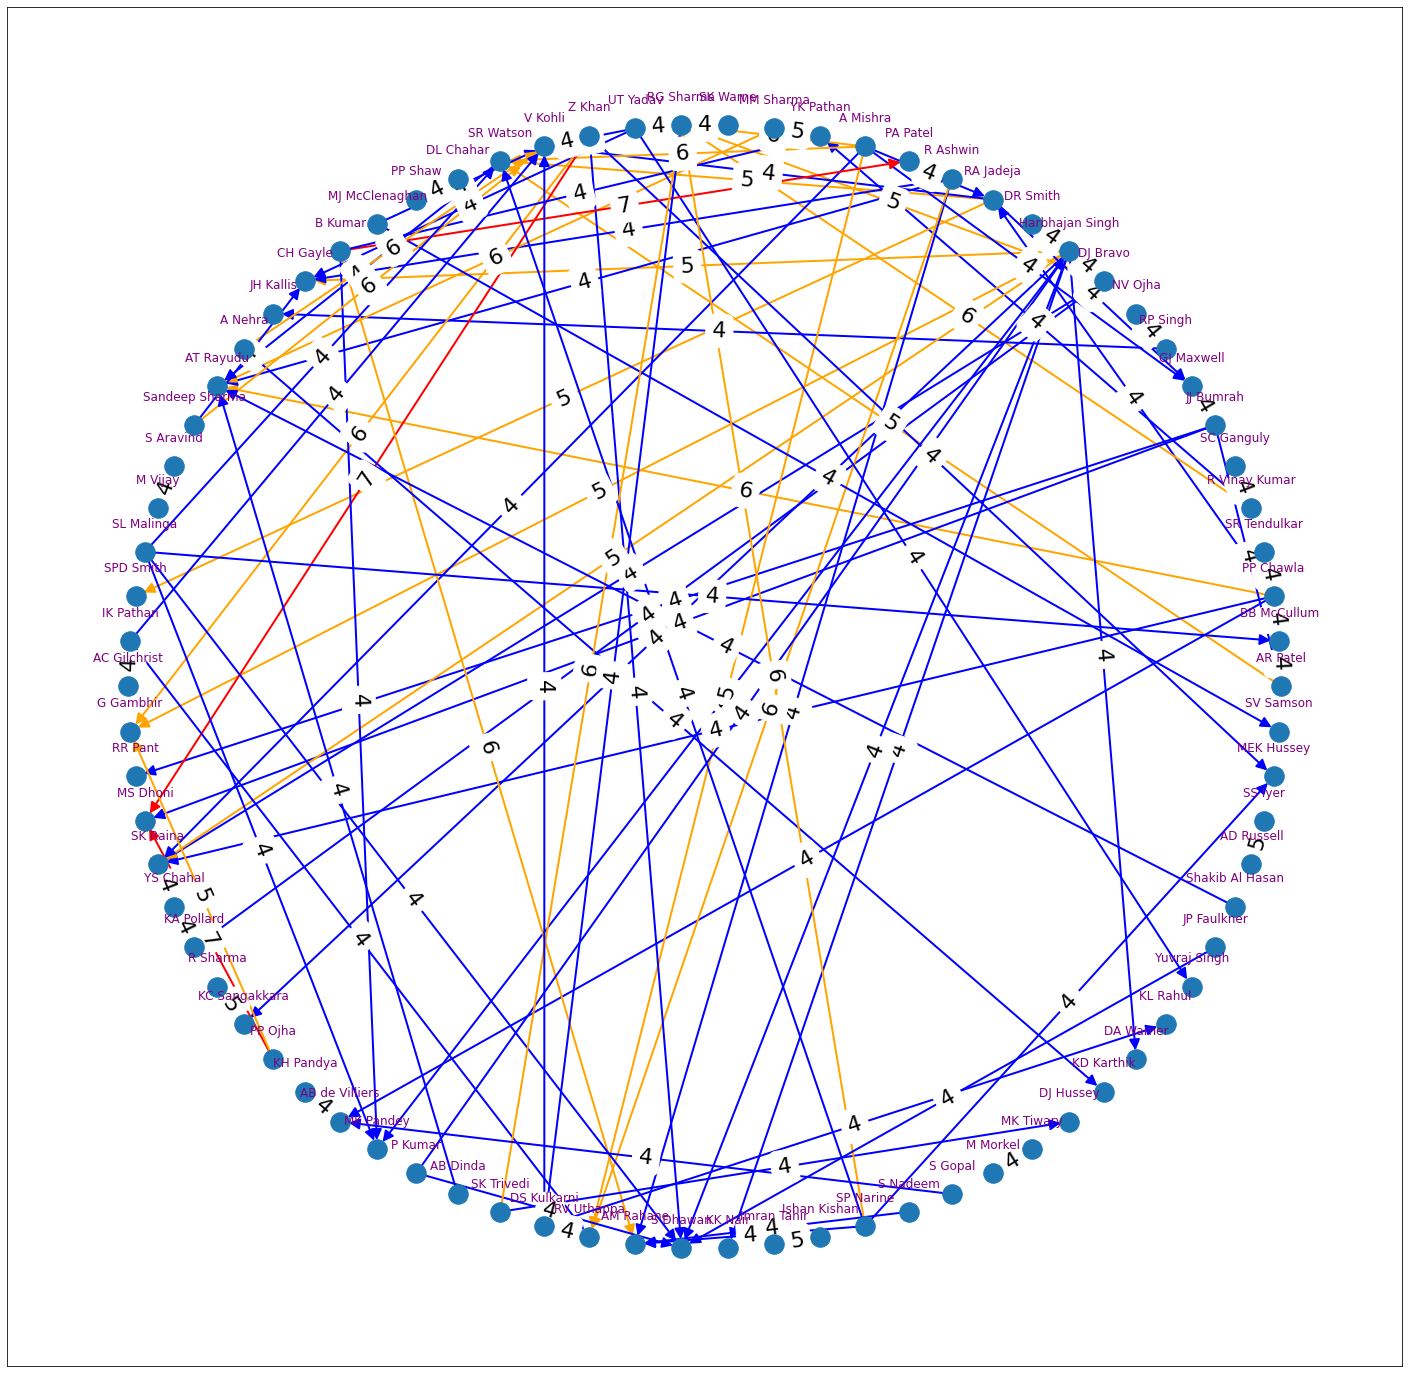

In [172]:
import matplotlib.pyplot as plt
import networkx as nx
 

B = nx.DiGraph()
plt.figure(figsize=(25,25)) 
 

for edge in edges_bo_ba_wickets:
    bo,ba,w = edge 
    ### Only bowlers who dismissed a batsman more than 3 times are added into the graph
    if w>3:
        B.add_weighted_edges_from([(bo,ba,w)])

## Coloring the edges based wickets dismissed
edge_colors = [] 
for e  in B.edges():
    n1,n2 = e
    if B[n1][n2]["weight"] > 6:         
        edge_colors.append('red')
    elif B[n1][n2]["weight"] > 4:
        edge_colors.append('orange')
    else:
        edge_colors.append('blue')    

    
pos = []
pos = nx.circular_layout(B)  # positions for all nodes


nx.draw_networkx_nodes(B, pos, node_size=380)
nx.draw_networkx_edges(B, pos, width=2,arrowsize=22,edge_color=edge_colors)

weight_labels = nx.get_edge_attributes(B,'weight') 
nx.draw_networkx_edge_labels(B,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

label_pos = pos
for k in pos.keys():
    label_pos[k]=pos[k]+[0,0.05]
nx.draw_networkx_labels(B, label_pos, font_size=12, font_family="sans-serif",font_color = 'purple')

### Constructing batsmen partnership network

In [474]:
#The logic is essentially the same as that for batsem-bowler-runs, except that this time the batsmen on the
#non-striker end replaces the bowler.
def construct__batsman_batsman_runs__partnership_tuple(data_match,inning):
    
    #creating empty lists to hold bowler,batsman,runs data to be zipped into tuples
    batsman_1 = []
    batsman_2 = []
    runs = []
    
    #set the key for the innings
    if inning is 2:
        key_inning = '2nd innings'
    elif inning is 1:
        key_inning = '1st innings'
    else:
        raise Exception("Error: innings is either 1 or 2.")
        return        
     
    _data = data_match['innings'][inning-1][key_inning]['deliveries'] 
    #number of overs bowled in this innings
    noOfOvers = len(_data)   
    
    #updating the lists with information from each ball bowled
    for over in range(0,noOfOvers):
        ballsinOver = _data[over].keys()
        for ball in ballsinOver:
            batsman_1.append(_data[over][ball]['batsman'])
            batsman_2.append(_data[over][ball]['non_striker'])
            runs.append(_data[over][ball]['runs']['total'])
            
    #Forming a nested tuple of the form: ((bowler,batsman),runs)
    #The weights of the node would be total runs conceded by a bowler to a batsmen.
    #Currently these tuples are for individual deliveries.    
    batsman_batsman = zip(batsman_2,batsman_1)
    batsman_batsman__runs = zip(batsman_batsman,runs)
    
    batsman_batsman__runs = [((b1,b2), ru) for((b1,b2),ru) in batsman_batsman__runs]
    
    return batsman_batsman__runs

In [242]:
## Creating an alias for the same function for creating edges 
create_edges_for_graph_ba_ba_ru = create_edges_for_graph_bo_ba_ru

In [309]:
## Testing with a few examples

nested_tuple_ba_ba=construct__batsman_batsman_runs__partnership_tuple(data[101],1)
nested_tuple_ba_ba.extend(construct__batsman_batsman_runs__partnership_tuple(data[101],2))
tuples_for_edges_ba_ba = create_edges_for_graph_ba_ba_ru([nested_tuple_ba_ba])
 
print(tuples_for_edges_ba_ba)
 
 

[('AT Rayudu', 'SR Watson', 7), ('SR Watson', 'AT Rayudu', 12), ('SR Watson', 'SK Raina', 52), ('SK Raina', 'SR Watson', 34), ('MS Dhoni', 'SK Raina', 7), ('SK Raina', 'MS Dhoni', 7), ('SW Billings', 'MS Dhoni', 27), ('MS Dhoni', 'SW Billings', 28), ('MS Dhoni', 'DJ Bravo', 1), ('DJ Bravo', 'MS Dhoni', 1), ('BA Stokes', 'JC Buttler', 37), ('JC Buttler', 'BA Stokes', 11), ('AM Rahane', 'JC Buttler', 1), ('JC Buttler', 'AM Rahane', 4), ('JC Buttler', 'SV Samson', 22), ('SV Samson', 'JC Buttler', 24), ('P Chopra', 'JC Buttler', 2), ('JC Buttler', 'P Chopra', 8), ('JC Buttler', 'STR Binny', 22), ('STR Binny', 'JC Buttler', 15), ('K Gowtham', 'JC Buttler', 5), ('JC Buttler', 'K Gowtham', 14), ('JC Archer', 'JC Buttler', 12)]


#### Example of Heterogenous graph

In [310]:
## It would be better to write acutom compose/update methods for our case.
## For now doing it edge by edge.
print(edges_bo_ba_wickets)
print('----')
print(tuples_for_edges_ba_ba)
print('----')
print(tuples_for_edges_bo_ba_ru)

[('BA Stokes', 'Harbhajan Singh', 20), ('SW Billings', 'BA Stokes', 20), ('P Chopra', 'SN Thakur', 20), ('AT Rayudu', 'JC Archer', 20), ('K Gowtham', 'DJ Willey', 20), ('STR Binny', 'DJ Bravo', 20), ('SK Raina', 'IS Sodhi', 20), ('AM Rahane', 'RA Jadeja', 20), ('SR Watson', 'JC Archer', 20), ('SV Samson', 'DJ Bravo', 20)]
----
[('AT Rayudu', 'SR Watson', 7), ('SR Watson', 'AT Rayudu', 12), ('SR Watson', 'SK Raina', 52), ('SK Raina', 'SR Watson', 34), ('MS Dhoni', 'SK Raina', 7), ('SK Raina', 'MS Dhoni', 7), ('SW Billings', 'MS Dhoni', 27), ('MS Dhoni', 'SW Billings', 28), ('MS Dhoni', 'DJ Bravo', 1), ('DJ Bravo', 'MS Dhoni', 1), ('BA Stokes', 'JC Buttler', 37), ('JC Buttler', 'BA Stokes', 11), ('AM Rahane', 'JC Buttler', 1), ('JC Buttler', 'AM Rahane', 4), ('JC Buttler', 'SV Samson', 22), ('SV Samson', 'JC Buttler', 24), ('P Chopra', 'JC Buttler', 2), ('JC Buttler', 'P Chopra', 8), ('JC Buttler', 'STR Binny', 22), ('STR Binny', 'JC Buttler', 15), ('K Gowtham', 'JC Buttler', 5), ('JC Bu

In [326]:
#combining edges
from collections import defaultdict  
def combine_edges(combined_edge_list):    
    ddict = defaultdict(list)
    
    for edge in combined_edge_list:
        n1,n2,w = edge
        ddict[(n1,n2)].append(w)
         
        
    for k in ddict.keys():
        ddict[k] = sum(ddict[k])
    
    remove_keys_list = []
    
    for k in ddict.keys():
        n1,n2 = k  
        #print('--'+str(k))
        if (n2,n1) in ddict:
            
            #print(f'key is {(n2,n1)} and value {ddict[(n2,n1)]}')
            #print(ddict[k])
            ddict[k] = ddict[k]+ddict[(n2,n1)]
            #print(ddict[k])
            remove_keys_list.append((n2,n1))
            
    l = len(remove_keys_list)        
            
    for i in  range(0,int(l/2)):
        #print(f'removing{remove_keys_list[i]}')
        del ddict[remove_keys_list[i]]
        
    edges = list(zip( ddict.keys(), ddict.values() ) )
    
    
    return [(n1,n2,w) for (n1,n2),w in edges]   
    
    

In [312]:
all_edges = []
all_edges =  edges_bo_ba_wickets +  tuples_for_edges_bo_ba_ru
print(all_edges)
c_edges = combine_edges(all_edges)
c_edges

[('BA Stokes', 'Harbhajan Singh', 20), ('SW Billings', 'BA Stokes', 20), ('P Chopra', 'SN Thakur', 20), ('AT Rayudu', 'JC Archer', 20), ('K Gowtham', 'DJ Willey', 20), ('STR Binny', 'DJ Bravo', 20), ('SK Raina', 'IS Sodhi', 20), ('AM Rahane', 'RA Jadeja', 20), ('SR Watson', 'JC Archer', 20), ('SV Samson', 'DJ Bravo', 20), ('K Gowtham', 'SR Watson', 6), ('K Gowtham', 'AT Rayudu', 6), ('Ankit Sharma', 'AT Rayudu', 6), ('Ankit Sharma', 'SR Watson', 5), ('JC Archer', 'AT Rayudu', 0), ('JC Archer', 'SK Raina', 16), ('JC Archer', 'SR Watson', 6), ('K Gowtham', 'SK Raina', 16), ('BA Stokes', 'SK Raina', 9), ('BA Stokes', 'SR Watson', 4), ('JD Unadkat', 'SK Raina', 6), ('JD Unadkat', 'SR Watson', 10), ('IS Sodhi', 'SK Raina', 12), ('IS Sodhi', 'SR Watson', 10), ('JC Archer', 'MS Dhoni', 13), ('IS Sodhi', 'MS Dhoni', 7), ('BA Stokes', 'MS Dhoni', 2), ('BA Stokes', 'SW Billings', 15), ('IS Sodhi', 'SW Billings', 1), ('JD Unadkat', 'MS Dhoni', 13), ('JD Unadkat', 'SW Billings', 5), ('JC Archer', 

[('BA Stokes', 'Harbhajan Singh', 30),
 ('SW Billings', 'BA Stokes', 35),
 ('P Chopra', 'SN Thakur', 24),
 ('AT Rayudu', 'JC Archer', 20),
 ('K Gowtham', 'DJ Willey', 34),
 ('STR Binny', 'DJ Bravo', 26),
 ('SK Raina', 'IS Sodhi', 32),
 ('AM Rahane', 'RA Jadeja', 24),
 ('SR Watson', 'JC Archer', 26),
 ('SV Samson', 'DJ Bravo', 21),
 ('K Gowtham', 'SR Watson', 6),
 ('K Gowtham', 'AT Rayudu', 6),
 ('Ankit Sharma', 'AT Rayudu', 6),
 ('Ankit Sharma', 'SR Watson', 5),
 ('JC Archer', 'SK Raina', 16),
 ('K Gowtham', 'SK Raina', 16),
 ('BA Stokes', 'SK Raina', 9),
 ('BA Stokes', 'SR Watson', 4),
 ('JD Unadkat', 'SK Raina', 6),
 ('JD Unadkat', 'SR Watson', 10),
 ('IS Sodhi', 'SR Watson', 10),
 ('JC Archer', 'MS Dhoni', 13),
 ('IS Sodhi', 'MS Dhoni', 7),
 ('BA Stokes', 'MS Dhoni', 2),
 ('IS Sodhi', 'SW Billings', 1),
 ('JD Unadkat', 'MS Dhoni', 13),
 ('JD Unadkat', 'SW Billings', 5),
 ('JC Archer', 'SW Billings', 7),
 ('BA Stokes', 'DJ Bravo', 1),
 ('DJ Willey', 'JC Buttler', 22),
 ('Harbhajan Si

--('BA Stokes', 'Harbhajan Singh')
key is ('Harbhajan Singh', 'BA Stokes') and value 10
20
30
--('SW Billings', 'BA Stokes')
key is ('BA Stokes', 'SW Billings') and value 15
20
35
--('P Chopra', 'SN Thakur')
key is ('SN Thakur', 'P Chopra') and value 4
20
24
--('AT Rayudu', 'JC Archer')
key is ('JC Archer', 'AT Rayudu') and value 0
20
20
--('K Gowtham', 'DJ Willey')
key is ('DJ Willey', 'K Gowtham') and value 14
20
34
--('STR Binny', 'DJ Bravo')
key is ('DJ Bravo', 'STR Binny') and value 6
20
26
--('SK Raina', 'IS Sodhi')
key is ('IS Sodhi', 'SK Raina') and value 12
20
32
--('AM Rahane', 'RA Jadeja')
key is ('RA Jadeja', 'AM Rahane') and value 4
20
24
--('SR Watson', 'JC Archer')
key is ('JC Archer', 'SR Watson') and value 6
20
26
--('SV Samson', 'DJ Bravo')
key is ('DJ Bravo', 'SV Samson') and value 1
20
21
--('K Gowtham', 'SR Watson')
--('K Gowtham', 'AT Rayudu')
--('Ankit Sharma', 'AT Rayudu')
--('Ankit Sharma', 'SR Watson')
--('JC Archer', 'AT Rayudu')
key is ('AT Rayudu', 'JC Arch

{'K Gowtham': Text(1.0, 0.050000009392366616, 'K Gowtham'),
 'SR Watson': Text(0.9594929815710505, 0.33173256764234493, 'SR Watson'),
 'AT Rayudu': Text(0.8412535195958426, 0.5906407789504252, 'AT Rayudu'),
 'Ankit Sharma': Text(0.6548607361084332, 0.805749590077248, 'Ankit Sharma'),
 'JC Archer': Text(0.4154150505790146, 0.9596319738563376, 'JC Archer'),
 'SK Raina': Text(0.14231486908984836, 1.039821440061206, 'SK Raina'),
 'BA Stokes': Text(-0.14231483251427102, 1.039821440061206, 'BA Stokes'),
 'JD Unadkat': Text(-0.4154150140034373, 0.9596319738563376, 'JD Unadkat'),
 'IS Sodhi': Text(-0.6548606697305336, 0.8057496496818926, 'IS Sodhi'),
 'MS Dhoni': Text(-0.8412535724272322, 0.5906407789504252, 'MS Dhoni'),
 'SW Billings': Text(-0.9594929747977954, 0.3317326272469895, 'SW Billings'),
 'DJ Bravo': Text(-0.9999999932267448, 0.049999921969590334, 'DJ Bravo'),
 'DJ Willey': Text(-0.9594929747977954, -0.2317325488576117, 'DJ Willey'),
 'JC Buttler': Text(-0.8412535724272322, -0.490640

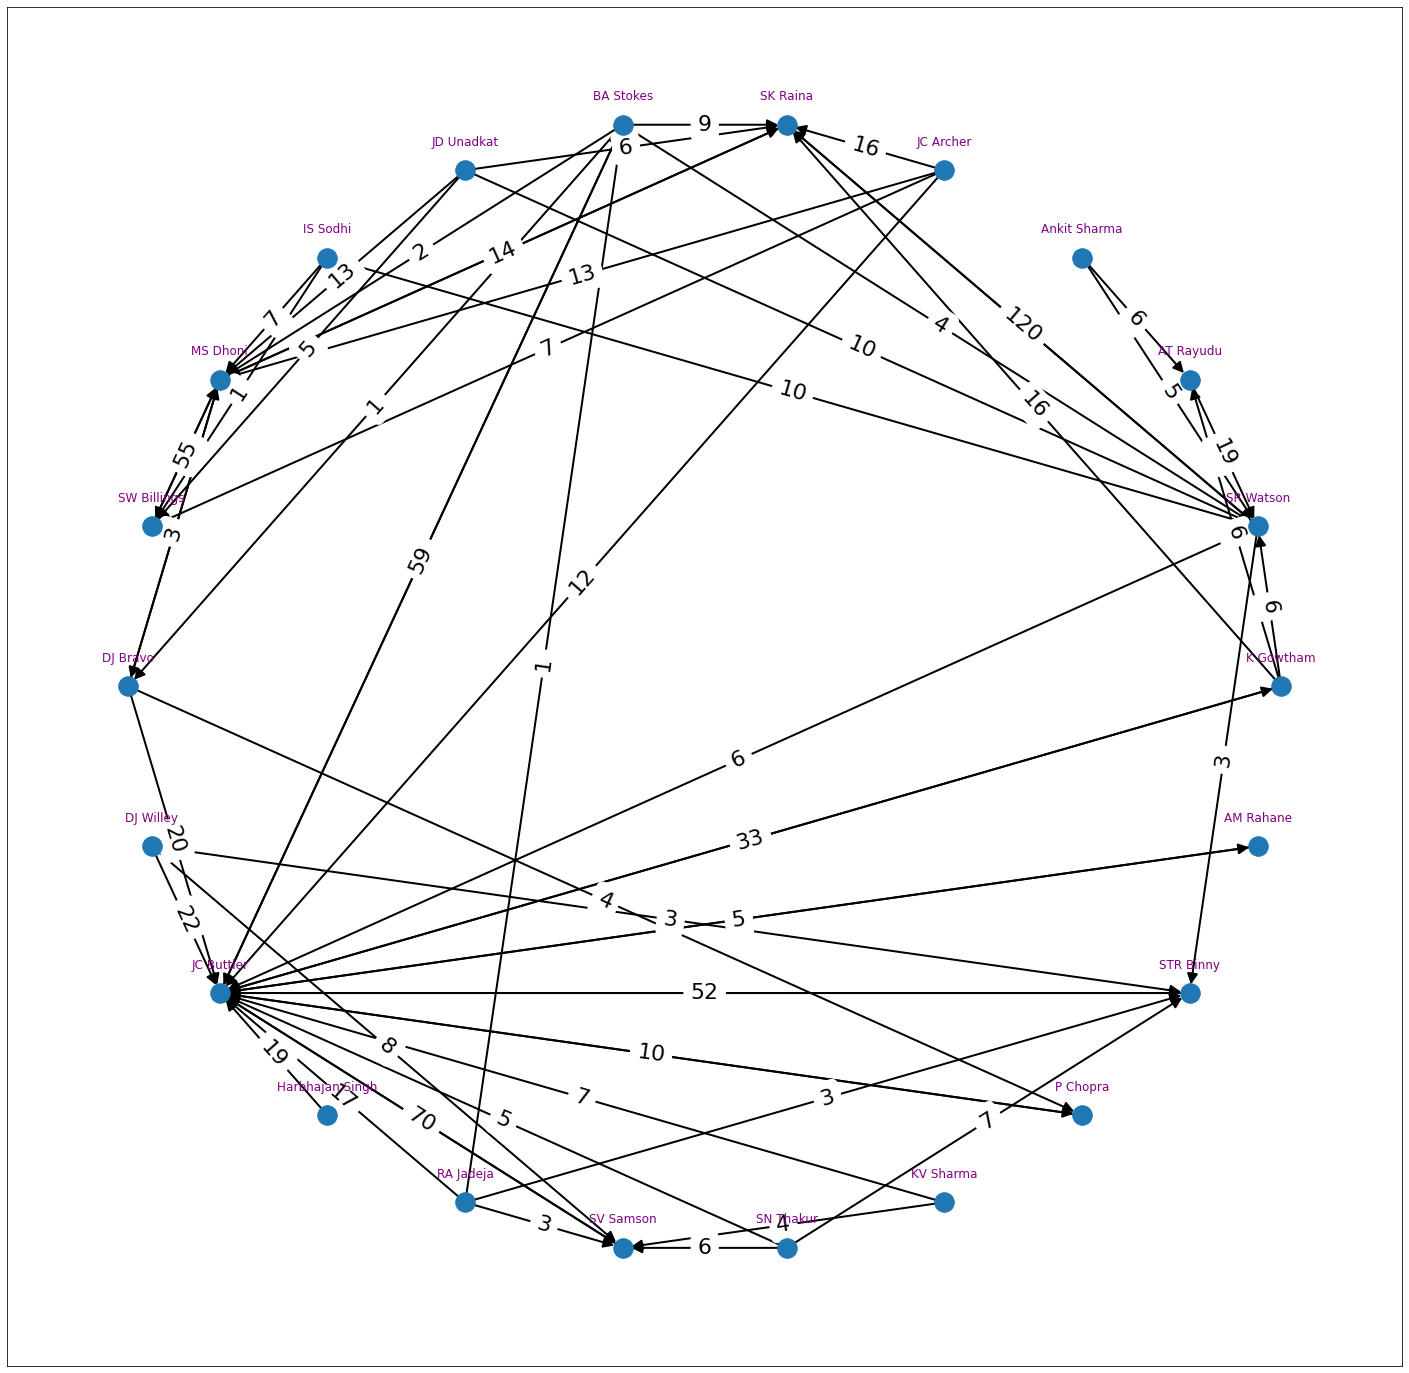

In [316]:
##This is a graph being constructed for data[100]

import matplotlib.pyplot as plt
import networkx as nx
 

H = nx.DiGraph()
plt.figure(figsize=(25,25)) 
 
all_edges = []
all_edges =  edges_bo_ba_wickets +  tuples_for_edges_bo_ba_ru + tuples_for_edges_ba_ba  
              
combined_edges =  combine_edges(all_edges)  

for edge in combined_edges:
    n1,n2,w = edge
    H.add_weighted_edges_from([(n1,n2,w)])
    
pos = []
pos = nx.circular_layout(H)  # positions for all nodes


nx.draw_networkx_nodes(H, pos, node_size=380)
nx.draw_networkx_edges(H, pos, width=2,arrowsize=22)

weight_labels = nx.get_edge_attributes(H,'weight') 
nx.draw_networkx_edge_labels(H,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

label_pos = pos
for k in pos.keys():
    label_pos[k]=pos[k]+[0,0.05]
nx.draw_networkx_labels(H, label_pos, font_size=12, font_family="sans-serif",font_color = 'purple')

In [254]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(H, alpha=0.9)
pr

{'Sandeep Sharma': 0.00526315789473684,
 'RR Pant': 0.06456984964862475,
 'Shakib Al Hasan': 0.00526315789473684,
 'JJ Roy': 0.07556965775900881,
 'Rashid Khan': 0.00526315789473684,
 'PP Shaw': 0.07538370937660487,
 'B Kumar': 0.00526315789473684,
 'GJ Maxwell': 0.021939140870742415,
 'HV Patel': 0.04630470245603268,
 'AD Hales': 0.06196597622995885,
 'SS Iyer': 0.010354950392572483,
 'S Kaul': 0.00526315789473684,
 'TA Boult': 0.00526315789473684,
 'S Dhawan': 0.3231956650092075,
 'KS Williamson': 0.2680847693098799,
 'S Nadeem': 0.00526315789473684,
 'LE Plunkett': 0.00526315789473684,
 'A Mishra': 0.00526315789473684,
 'V Shankar': 0.00526315789473684}

In [256]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(H, alpha=0.9)
pr

{'Sandeep Sharma': 0.03272217290968914,
 'RR Pant': 0.12236482709808301,
 'Shakib Al Hasan': 0.03272217290968914,
 'JJ Roy': 0.048013507308439715,
 'Rashid Khan': 0.03272217290968914,
 'PP Shaw': 0.045836879953454784,
 'B Kumar': 0.03272217290968914,
 'GJ Maxwell': 0.04607504519620174,
 'HV Patel': 0.04701922291786399,
 'AD Hales': 0.05961760041932437,
 'SS Iyer': 0.034270564118360214,
 'S Kaul': 0.03272217290968914,
 'TA Boult': 0.03272217290968914,
 'S Dhawan': 0.1597741950876028,
 'KS Williamson': 0.10980642880377804,
 'S Nadeem': 0.03272217290968914,
 'LE Plunkett': 0.03272217290968914,
 'A Mishra': 0.03272217290968914,
 'V Shankar': 0.03272217290968914}

In [306]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(H, alpha=0.9)
pr

{'JJ Roy': 0.03917776808510293,
 'Shakib Al Hasan': 0.07642849417749781,
 'RR Pant': 0.11571943421250165,
 'Rashid Khan': 0.08446987051209333,
 'Sandeep Sharma': 0.055308208922105154,
 'GJ Maxwell': 0.041950615518318496,
 'B Kumar': 0.043853430982304466,
 'AD Hales': 0.020051868323242877,
 'HV Patel': 0.12522672060108864,
 'PP Shaw': 0.025947684278361437,
 'SS Iyer': 0.026995819008015634,
 'S Kaul': 0.01781464402069181,
 'TA Boult': 0.01781464402069181,
 'S Dhawan': 0.15084193066521007,
 'KS Williamson': 0.08714029059000634,
 'S Nadeem': 0.01781464402069181,
 'LE Plunkett': 0.01781464402069181,
 'A Mishra': 0.01781464402069181,
 'V Shankar': 0.01781464402069181}

In [314]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(H, alpha=0.9)
pr

{'BA Stokes': 0.04543545907273793,
 'Harbhajan Singh': 0.04114700874175102,
 'SW Billings': 0.03325225222822509,
 'P Chopra': 0.027107759242337777,
 'SN Thakur': 0.038874911798232284,
 'AT Rayudu': 0.022845739705234618,
 'JC Archer': 0.07703674035129632,
 'K Gowtham': 0.014477603621365812,
 'DJ Willey': 0.021622998359646484,
 'STR Binny': 0.037793517847082396,
 'DJ Bravo': 0.08420214967177797,
 'SK Raina': 0.05895533443934864,
 'IS Sodhi': 0.06753586608416032,
 'AM Rahane': 0.014477603621365812,
 'RA Jadeja': 0.02750744108528939,
 'SR Watson': 0.06281882492132872,
 'SV Samson': 0.03869056525054331,
 'Ankit Sharma': 0.014477603621365812,
 'JD Unadkat': 0.014477603621365812,
 'MS Dhoni': 0.0699133110363841,
 'JC Buttler': 0.1728721020577947,
 'KV Sharma': 0.014477603621365812}

In [317]:
#Let us apply PageRank to this Graph
pr = nx.pagerank(H, alpha=0.9)
pr

{'K Gowtham': 0.03353358180857944,
 'SR Watson': 0.15032632116874958,
 'AT Rayudu': 0.01062963948736057,
 'Ankit Sharma': 0.004545454545454544,
 'JC Archer': 0.004545454545454544,
 'SK Raina': 0.16168257071651979,
 'BA Stokes': 0.05654316692498086,
 'JD Unadkat': 0.004545454545454544,
 'IS Sodhi': 0.004545454545454544,
 'MS Dhoni': 0.11902589718559464,
 'SW Billings': 0.09577721086100456,
 'DJ Bravo': 0.0075045966018320726,
 'DJ Willey': 0.004545454545454544,
 'JC Buttler': 0.19715755310687313,
 'Harbhajan Singh': 0.004545454545454544,
 'RA Jadeja': 0.004545454545454544,
 'SV Samson': 0.04930748593702809,
 'SN Thakur': 0.004545454545454544,
 'KV Sharma': 0.004545454545454544,
 'P Chopra': 0.021357788816256044,
 'STR Binny': 0.043793789040732736,
 'AM Rahane': 0.012451307435397695}

In [315]:
data[101]

{'meta': {'data_version': 0.9, 'created': '2019-04-19', 'revision': 1},
 'info': {'venue': 'Sawai Mansingh Stadium',
  'competition': 'IPL',
  'dates': ['2018-05-11'],
  'gender': 'male',
  'teams': ['Rajasthan Royals', 'Chennai Super Kings'],
  'outcome': {'winner': 'Rajasthan Royals', 'by': {'wickets': 4}},
  'toss': {'decision': 'bat', 'winner': 'Chennai Super Kings'},
  'player_of_match': ['JC Buttler'],
  'match_type': 'T20',
  'overs': 20,
  'city': 'Jaipur',
  'umpires': ['M Erasmus', 'YC Barde']},
 'innings': [{'1st innings': {'team': 'Chennai Super Kings',
    'deliveries': [{0.1: {'non_striker': 'AT Rayudu',
       'bowler': 'K Gowtham',
       'runs': {'extras': 0, 'total': 1, 'batsman': 1},
       'batsman': 'SR Watson'}},
     {0.2: {'non_striker': 'SR Watson',
       'bowler': 'K Gowtham',
       'runs': {'extras': 0, 'total': 0, 'batsman': 0},
       'batsman': 'AT Rayudu'}},
     {0.3: {'non_striker': 'SR Watson',
       'bowler': 'K Gowtham',
       'runs': {'extras': 

## Determining player of the match using Pagerank for IPL matches

In [411]:
def _players_in_each_team(match):
    teamA = []
    teamB = []
    
    one = match['innings'][0]['1st innings']['deliveries'] 
    two = match['innings'][1]['2nd innings']['deliveries'] 
    
    noOfOvers = len(one)   
    
    #updating the lists with information from each ball bowled
    for over in range(0,noOfOvers):
        ballsinOver = one[over].keys()
        for ball in ballsinOver:
            teamA.append(one[over][ball]['batsman'])
            teamA.append(one[over][ball]['non_striker'])
            teamB.append(one[over][ball]['bowler'])
            
    noOfOvers = len(two)   
    
    #updating the lists with information from each ball bowled
    for over in range(0,noOfOvers):
        ballsinOver = two[over].keys()
        for ball in ballsinOver:
            teamB.append(two[over][ball]['batsman'])
            teamB.append(two[over][ball]['non_striker'])
            teamA.append(two[over][ball]['bowler'])
    #print(match['innings'][0]['1st innings']['team'])
    #print(match['innings'][1]['2nd innings']['team'])
    return {match['innings'][0]['1st innings']['team']:list(set(teamA)),match['innings'][1]['2nd innings']['team']:list(set(teamB))}

In [412]:
_players_in_each_team(data[100])

{'Delhi Daredevils': ['HV Patel',
  'RR Pant',
  'S Nadeem',
  'SS Iyer',
  'JJ Roy',
  'TA Boult',
  'LE Plunkett',
  'PP Shaw',
  'GJ Maxwell',
  'A Mishra',
  'V Shankar'],
 'Sunrisers Hyderabad': ['Sandeep Sharma',
  'Shakib Al Hasan',
  'S Dhawan',
  'B Kumar',
  'KS Williamson',
  'Rashid Khan',
  'AD Hales',
  'S Kaul']}

In [476]:
import matplotlib.pyplot as plt
import networkx as nx
correct = 0
not_correct =0
for match in data:
    # if the match was abandoned, no need to proceed
    if 'player_of_match' in match['info'].keys():
        try:
            _winner = match['info']['outcome']['winner']
        except:
            continue
        _pom = match['info']['player_of_match']        
        
        ### building bo_ba_ru network for the match
        bo_ba_ru = construct__bowler_batsman_runs__tuple(match,1)
        bo_ba_ru.extend(construct__bowler_batsman_runs__tuple(match,2))
        bo_ba_ru = create_edges_for_graph_bo_ba_ru([bo_ba_ru])
        #print(bo_ba_ru)
 
        ### building bo_ba_w network for the match
        bo_ba_w = construct__bowler_batsman__dismissal_tuple(match,1)
        bo_ba_w.extend(construct__bowler_batsman__dismissal_tuple(match,2))
        bo_ba_w = create_edges_for_graph_bo_ba_dismissals(bo_ba_w)
        
        ### building ba_ba_ru network for the match        
        ba_ba_ru = construct__batsman_batsman_runs__partnership_tuple(match,1)
        ba_ba_ru.extend(construct__batsman_batsman_runs__partnership_tuple(match,2))
        ba_ba_ru = create_edges_for_graph_ba_ba_ru([nested_tuple_ba_ba])
    
        ## combine the heterogenous edges and nodes
        edges = combine_edges( bo_ba_ru)
 
        team_dict =  _players_in_each_team(match)
        #print(team_dict.keys())

        H = nx.DiGraph()
        for edge in edges:
            n1,n2,w = edge
            H.add_weighted_edges_from([(n1,n2,w)])
    
        page_rank_d = nx.pagerank(H,alpha=0.9,weight='weight',max_iter=1000)
        
       
        winning_team  = team_dict[_winner]    
        #print(winning_team)
         
         
        new_page_rank_d = {k: page_rank_d[k] for k in winning_team if k in page_rank_d.keys() }     
            
        
        
        page_rank = sorted(new_page_rank_d.items(), key=lambda x: x[1], reverse=True)
        
        print(f'{page_rank[0]} and the actual PoM is {_pom} who has pagerank value of') #{page_rank_d[_pom[0]]}' )
        
        if page_rank[0][0]==_pom[0]:   
            
            correct +=1
        else:
            not_correct+=1
        #break
        
        

('MC Henriques', 0.0984933859232443) and the actual PoM is ['Yuvraj Singh'] who has pagerank value of
('SPD Smith', 0.1404681103578825) and the actual PoM is ['SPD Smith'] who has pagerank value of
('CA Lynn', 0.13898988789526284) and the actual PoM is ['CA Lynn'] who has pagerank value of
('GJ Maxwell', 0.09726582180887106) and the actual PoM is ['GJ Maxwell'] who has pagerank value of
('KM Jadhav', 0.11704226488029086) and the actual PoM is ['KM Jadhav'] who has pagerank value of
('DA Warner', 0.13877994692146092) and the actual PoM is ['Rashid Khan'] who has pagerank value of
('N Rana', 0.07348959685111292) and the actual PoM is ['N Rana'] who has pagerank value of
('HM Amla', 0.10030289196905766) and the actual PoM is ['AR Patel'] who has pagerank value of
('SV Samson', 0.13314187570752772) and the actual PoM is ['SV Samson'] who has pagerank value of
('N Rana', 0.10104570212598238) and the actual PoM is ['JJ Bumrah'] who has pagerank value of
('G Gambhir', 0.16789225543124822) and

('KA Pollard', 0.07161177461998391) and the actual PoM is ['AS Joseph'] who has pagerank value of
('SS Iyer', 0.12492653225122011) and the actual PoM is ['K Rabada'] who has pagerank value of
('SP Narine', 0.09473898699369827) and the actual PoM is ['HF Gurney'] who has pagerank value of
('KL Rahul', 0.11381402879554553) and the actual PoM is ['KL Rahul'] who has pagerank value of
('F du Plessis', 0.10678470590591432) and the actual PoM is ['DL Chahar'] who has pagerank value of
('KA Pollard', 0.08995991369633116) and the actual PoM is ['KA Pollard'] who has pagerank value of
('MS Dhoni', 0.13463132495088387) and the actual PoM is ['MS Dhoni'] who has pagerank value of
('S Dhawan', 0.16888626733155118) and the actual PoM is ['S Dhawan'] who has pagerank value of
('JC Buttler', 0.09197002305991794) and the actual PoM is ['JC Buttler'] who has pagerank value of
('V Kohli', 0.10126160414385721) and the actual PoM is ['AB de Villiers'] who has pagerank value of
('SK Raina', 0.0926961220159

('TM Dilshan', 0.12409784413872679) and the actual PoM is ['TM Dilshan'] who has pagerank value of
('KC Sangakkara', 0.09666518460001362) and the actual PoM is ['KC Sangakkara'] who has pagerank value of
('HH Gibbs', 0.16382961413675462) and the actual PoM is ['HH Gibbs'] who has pagerank value of
('SR Tendulkar', 0.12420737113830811) and the actual PoM is ['SR Tendulkar'] who has pagerank value of
('GC Smith', 0.175157100209859) and the actual PoM is ['YK Pathan'] who has pagerank value of
('MV Boucher', 0.09799750226290502) and the actual PoM is ['MV Boucher'] who has pagerank value of
('KC Sangakkara', 0.13560477284658812) and the actual PoM is ['KC Sangakkara'] who has pagerank value of
('KD Karthik', 0.10106349508832406) and the actual PoM is ['DP Nannes'] who has pagerank value of
('SK Raina', 0.13673838426368845) and the actual PoM is ['SK Raina'] who has pagerank value of
('JP Duminy', 0.08849511831015483) and the actual PoM is ['JP Duminy'] who has pagerank value of
('RE van d

('RV Uthappa', 0.14165432220651678) and the actual PoM is ['SB Wagh'] who has pagerank value of
('JH Kallis', 0.09424937896098684) and the actual PoM is ['JH Kallis'] who has pagerank value of
('R Dravid', 0.08040135928075326) and the actual PoM is ['SK Warne'] who has pagerank value of
('SR Tendulkar', 0.1733112591235098) and the actual PoM is ['SR Tendulkar'] who has pagerank value of
('PC Valthaty', 0.13936365064835227) and the actual PoM is ['PC Valthaty'] who has pagerank value of
('MD Mishra', 0.10770743915293123) and the actual PoM is ['MD Mishra'] who has pagerank value of
('B Chipli', 0.09793052948053353) and the actual PoM is ['DW Steyn'] who has pagerank value of
('G Gambhir', 0.15818765382612276) and the actual PoM is ['G Gambhir'] who has pagerank value of
('BB McCullum', 0.11852142863256111) and the actual PoM is ['BB McCullum'] who has pagerank value of
('MEK Hussey', 0.12719718436104918) and the actual PoM is ['MEK Hussey'] who has pagerank value of
('AC Gilchrist', 0.1

('DA Warner', 0.14147120485721543) and the actual PoM is ['UT Yadav'] who has pagerank value of
('Shakib Al Hasan', 0.09557848192865125) and the actual PoM is ['Shakib Al Hasan'] who has pagerank value of
('JP Duminy', 0.1304630175475084) and the actual PoM is ['DW Steyn'] who has pagerank value of
('SR Tendulkar', 0.2430546786654505) and the actual PoM is ['DR Smith'] who has pagerank value of
('JH Kallis', 0.07065405779189093) and the actual PoM is ['YK Pathan'] who has pagerank value of
('S Badrinath', 0.13107262814006979) and the actual PoM is ['MS Dhoni'] who has pagerank value of
('M Vijay', 0.15116574759489923) and the actual PoM is ['M Vijay'] who has pagerank value of
('MS Bisla', 0.09643283965887958) and the actual PoM is ['MS Bisla'] who has pagerank value of
('G Gambhir', 0.09532980112049526) and the actual PoM is ['SP Narine'] who has pagerank value of
('CH Gayle', 0.14440082799563364) and the actual PoM is ['CH Gayle'] who has pagerank value of
('PA Reddy', 0.075037291421

('MK Pandey', 0.10346015170115024) and the actual PoM is ['M Morkel'] who has pagerank value of
('DR Smith', 0.10882641619344023) and the actual PoM is ['A Nehra'] who has pagerank value of
('JP Faulkner', 0.07855967414388901) and the actual PoM is ['JP Faulkner'] who has pagerank value of
('BB McCullum', 0.131879627509701) and the actual PoM is ['BB McCullum'] who has pagerank value of
('CH Gayle', 0.14910894490440985) and the actual PoM is ['CH Gayle'] who has pagerank value of
('AM Rahane', 0.12655245164042822) and the actual PoM is ['DJ Hooda'] who has pagerank value of
('GJ Bailey', 0.11665295838414375) and the actual PoM is ['GJ Bailey'] who has pagerank value of
('DA Warner', 0.09425472143992303) and the actual PoM is ['DA Warner'] who has pagerank value of
('SPD Smith', 0.12175722692943107) and the actual PoM is ['SPD Smith'] who has pagerank value of
('RV Uthappa', 0.24022373554618423) and the actual PoM is ['AD Russell'] who has pagerank value of
('MA Agarwal', 0.104490648955

In [470]:
print(f'{correct} are correct and {not_correct} incorrect out of {len(data)} ')

363 are correct and 380 incorrect out of 754 


In [378]:
page_rank_d['TS Mills']

0.030750433716103354

In [344]:
data[0]

{'meta': {'data_version': 0.9,
  'created': datetime.date(2017, 4, 6),
  'revision': 1},
 'info': {'city': 'Hyderabad',
  'competition': 'IPL',
  'dates': [datetime.date(2017, 4, 5)],
  'gender': 'male',
  'match_type': 'T20',
  'outcome': {'by': {'runs': 35}, 'winner': 'Sunrisers Hyderabad'},
  'overs': 20,
  'player_of_match': ['Yuvraj Singh'],
  'teams': ['Sunrisers Hyderabad', 'Royal Challengers Bangalore'],
  'toss': {'decision': 'field', 'winner': 'Royal Challengers Bangalore'},
  'umpires': ['AY Dandekar', 'NJ Llong'],
  'venue': 'Rajiv Gandhi International Stadium, Uppal'},
 'innings': [{'1st innings': {'team': 'Sunrisers Hyderabad',
    'deliveries': [{0.1: {'batsman': 'DA Warner',
       'bowler': 'TS Mills',
       'non_striker': 'S Dhawan',
       'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
     {0.2: {'batsman': 'DA Warner',
       'bowler': 'TS Mills',
       'non_striker': 'S Dhawan',
       'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
     {0.3: {'batsman':

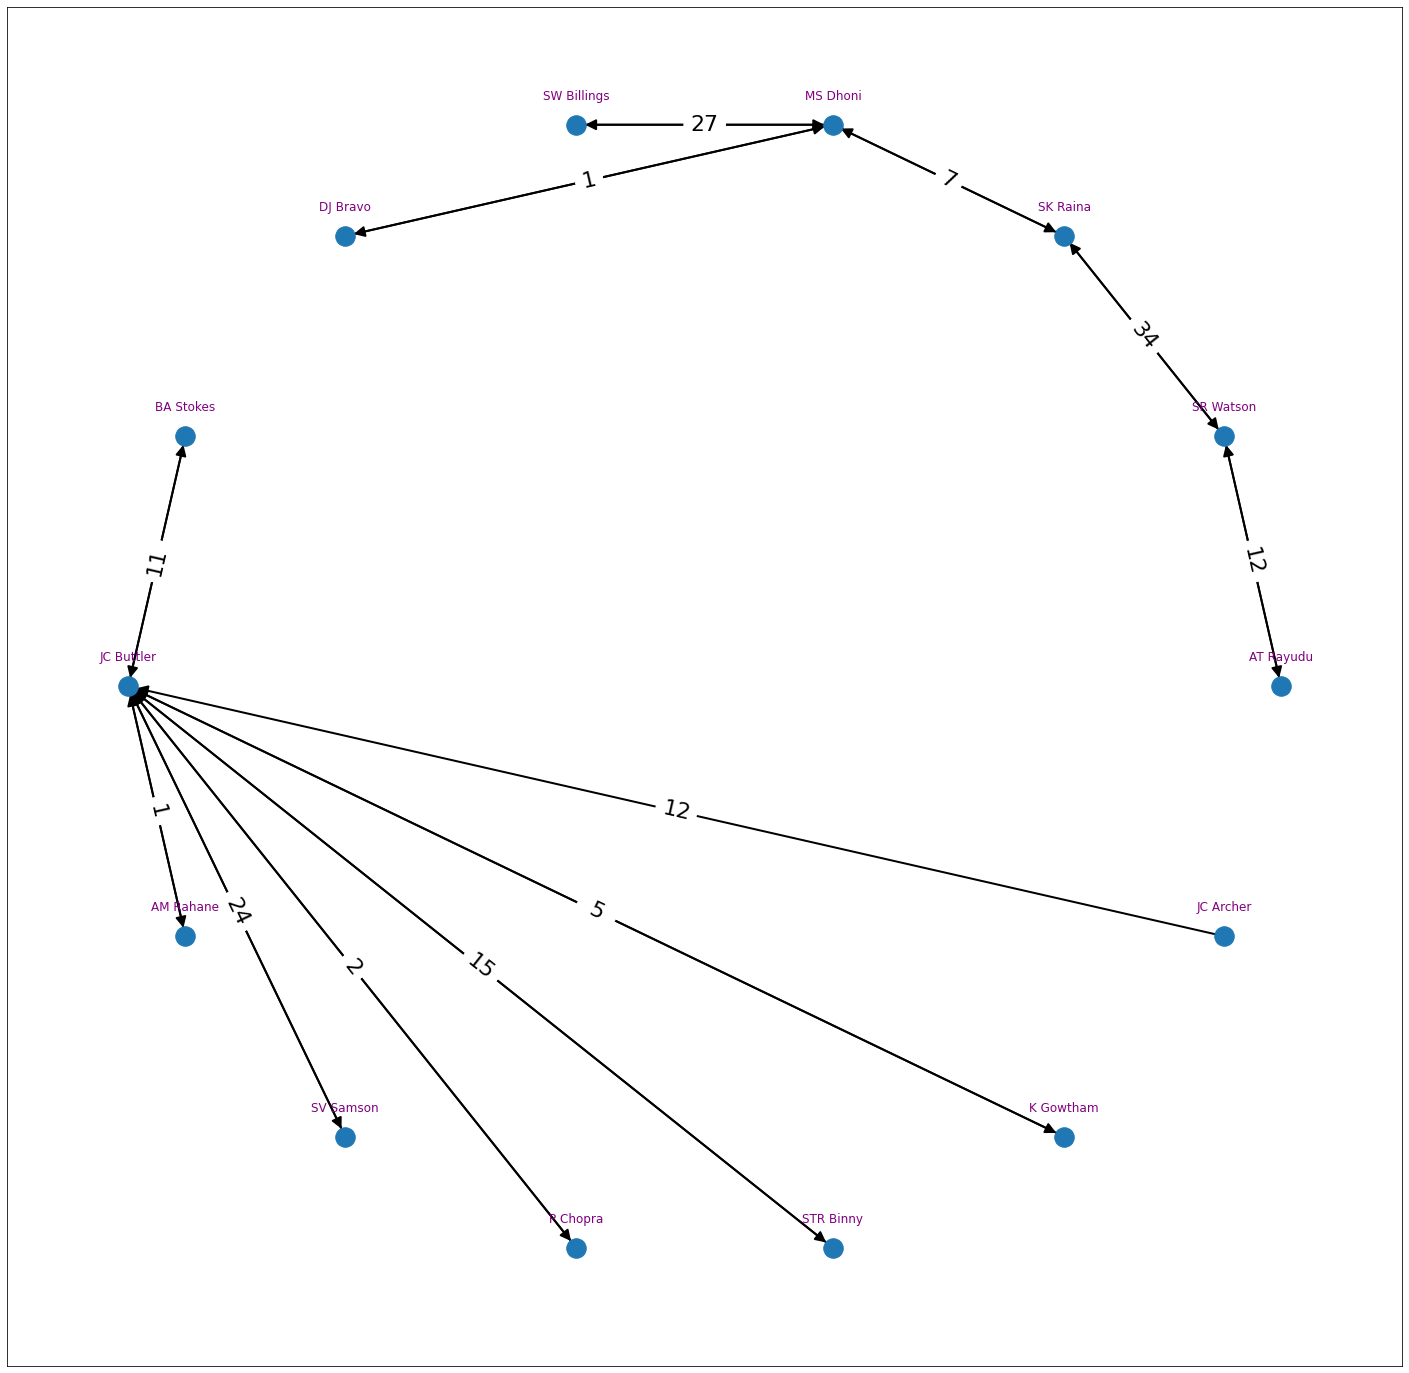

In [477]:
generate_plot(ba_ba_ru)

### Graph generation functions

In [472]:
def generate_plot(edges):
    H = nx.DiGraph()
    for edge in edges:
            n1,n2,w = edge
            H.add_weighted_edges_from([(n1,n2,w)])
    plt.figure(figsize=(25,25)) 
    pos = []
    pos = nx.circular_layout(H)  # positions for all nodes


    nx.draw_networkx_nodes(H, pos, node_size=380)
    nx.draw_networkx_edges(H, pos, width=2,arrowsize=22)

    weight_labels = nx.get_edge_attributes(H,'weight') 
    nx.draw_networkx_edge_labels(H,pos,edge_labels=weight_labels,font_size=22, font_family="sans-serif") 

    label_pos = pos
    for k in pos.keys():
        label_pos[k]=pos[k]+[0,0.05]
    nx.draw_networkx_labels(H, label_pos, font_size=12, font_family="sans-serif",font_color = 'purple')

# Comparing IPL Teams - Chennai Super Kings vs Mumbai Indians

In [89]:
##Let us find the top players from these two team who have dominated the IPL like no other.
#The idea is to form a network with the following logic-- batsmen of the same team are connected based on partnerships
#they had, bowlers and batsmen are connected through the wickets given and the runs made. The weight of the edges will be 
#mathematical functions of runs and wickets. 


In [54]:
# Let us first filter out the matches which are not between the two teams in focus.
# This functions accomplishes that
## Input: data of all matches, list of 2 teams
## Output: list matches between the two teams

def filter_team_duels_in_focus(data,team_duels_in_focus):
    team_duels_in_focus.sort()
    data_team_duels_in_focus = []

    for match in data:
        match['info']['teams'].sort()
        if match['info']['teams']  == team_duels_in_focus:
            data_team_duels_in_focus.append(match)
    return data_team_duels_in_focus
    
    

In [82]:
## Filtering data for CSK vs. MI
team_duels_in_focus = ['Chennai Super Kings','Mumbai Indians']
data_csk_mi = filter_team_duels_in_focus(data,team_duels_in_focus)

winner = [match['info']['outcome']['winner'] for match in data_csk_mi]



In [100]:
print(f'No. of matches between CSK and MI is: { len(data_csk_mi)}')
print(f'''CSK won { winner.count(team_duels_in_focus[0]) } times &
MI won {winner.count(team_duels_in_focus[1])} times''')

No. of matches between CSK and MI is: 28
CSK won 11 times &
MI won 17 times
